In [2]:
%matplotlib widget
%cd /data/seismo/kashyap/codes/p11-seismo-xl

/data/seismo/kashyap/codes/p11-seismo-xl


usage: compute_delnu.py [-h] [--kic KIC] [--lmax LMAX] [--Navg NAVG]
                        [--Nshift NSHIFT] [--inclang INCLANG]
                        [--freqmin FREQMIN] [--freqmax FREQMAX]

Process some integers.

optional arguments:
  -h, --help         show this help message and exit
  --kic KIC          Kepler KIC
  --lmax LMAX        Max ell observed in data
  --Navg NAVG        Length of sub-series (days)
  --Nshift NSHIFT    Shift between sub-series (days)
  --inclang INCLANG  Inclination angle
  --freqmin FREQMIN  Minimum freq in mHz
  --freqmax FREQMAX  Maximum freq in mHz


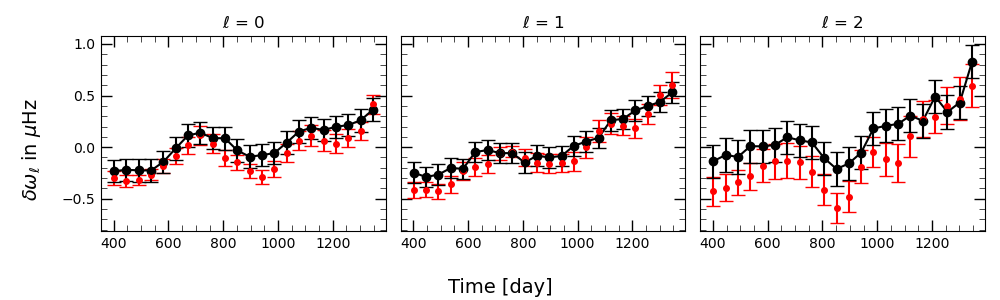

In [60]:
%run compute_delnu.py --help

LOADING SUCESS
(90979,)
(90979,)
----Number of frequency bins = 77760


Computing errors using MonteCarlo:   2%|▏         | 170/10000 [00:05<05:36, 29.24it/s]/data/seismo/kashyap/codes/p11-seismo-xl/analyze_8006161.py:265: OptimizeWarning: Covariance of the parameters could not be estimated
  coeff, var_matrix = curve_fit(gaussian, lags, corr, p0=p0)
Computing errors using MonteCarlo: 100%|██████████| 10000/10000 [05:47<00:00, 28.78it/s]


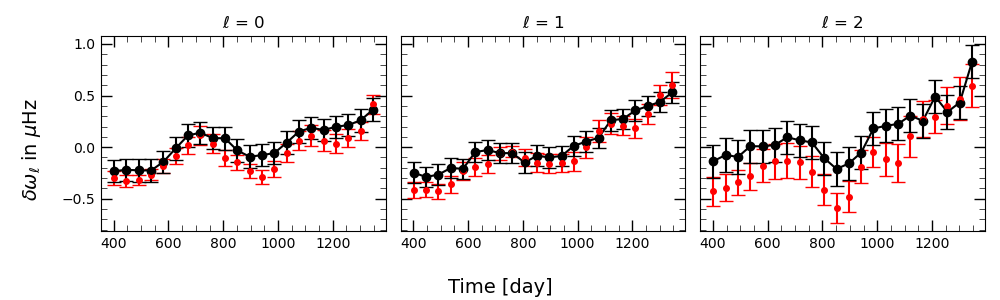

In [59]:
%run compute_delnu.py --kic 8006161 --Navg 180 --Nshift 45

In [4]:
a2g = amps*amps/fwhm

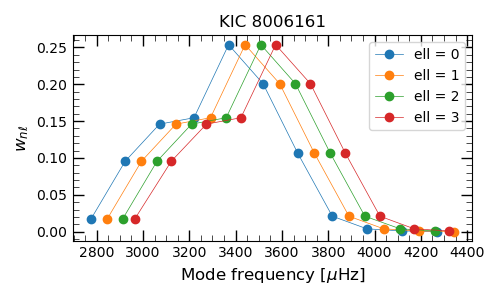

In [5]:
fig, axs = plt.subplots(figsize=(5, 3))
for ell, _mask in enumerate([mask0, mask1, mask2, mask3]):
    wnl = a2g[_mask]/a2g[_mask].sum()
    _nu = nus[_mask]*1e6
    axs.plot(_nu, wnl, '-o', label=f'ell = {ell}', lw=0.5)
axs.set_xlabel('Mode frequency [$\\mu$Hz]', fontsize=12)
axs.set_ylabel('$w_{n\\ell}$', fontsize=12)
axs.set_title('KIC 8006161')
axs.legend()
fig.tight_layout()
fig.savefig('/scratch/seismo/kashyap/cloud/Yandex.Disk/papers-posters-docs/2025-seismo-xl/wnl-8006161.png')

Text(0.02, 0.5, '$\\bar{\\delta\\nu}_\\ell$ in $\\mu$Hz')

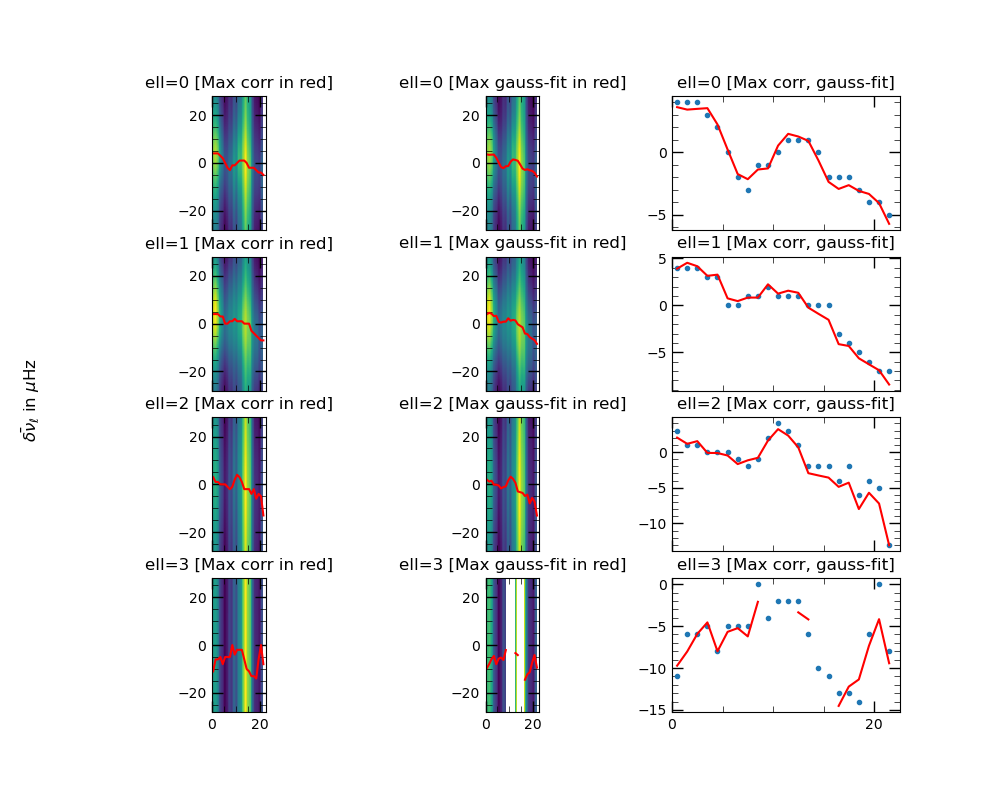

In [8]:
xax = np.arange(pschunks.shape[0])
fig, axs = plt.subplots(nrows=4, ncols=3, sharex=True, figsize=(10, 8))
axs[0, 0].imshow(corr_mat[0].T, extent=[0, xax.max(), -maxlag, maxlag,], origin='lower'); axs[0, 0].plot(xax+0.5, corr_matarg[0], 'r')
axs[1, 0].imshow(corr_mat[1].T, extent=[0, xax.max(), -maxlag, maxlag,], origin='lower'); axs[1, 0].plot(xax+0.5, corr_matarg[1], 'r')
axs[2, 0].imshow(corr_mat[2].T, extent=[0, xax.max(), -maxlag, maxlag,], origin='lower'); axs[2, 0].plot(xax+0.5, corr_matarg[2], 'r')
axs[3, 0].imshow(corr_mat[3].T, extent=[0, xax.max(), -maxlag, maxlag,], origin='lower'); axs[3, 0].plot(xax+0.5, corr_matarg[3], 'r')

axs[0, 1].imshow(corr_mat_gauss[0].T, extent=[0, xax.max(), -maxlag, maxlag,], origin='lower'); axs[0, 1].plot(xax+0.5, corr_matarg_gauss[0], 'r')
axs[1, 1].imshow(corr_mat_gauss[1].T, extent=[0, xax.max(), -maxlag, maxlag,], origin='lower'); axs[1, 1].plot(xax+0.5, corr_matarg_gauss[1], 'r')
axs[2, 1].imshow(corr_mat_gauss[2].T, extent=[0, xax.max(), -maxlag, maxlag,], origin='lower'); axs[2, 1].plot(xax+0.5, corr_matarg_gauss[2], 'r')
axs[3, 1].imshow(corr_mat_gauss[3].T, extent=[0, xax.max(), -maxlag, maxlag,], origin='lower'); axs[3, 1].plot(xax+0.5, corr_matarg_gauss[3], 'r')

axs[0, 2].plot(xax+0.5, corr_matarg[0], '.'); axs[0, 2].plot(xax+0.5, corr_matarg_gauss[0], '-r')
axs[1, 2].plot(xax+0.5, corr_matarg[1], '.'); axs[1, 2].plot(xax+0.5, corr_matarg_gauss[1], '-r')
axs[2, 2].plot(xax+0.5, corr_matarg[2], '.'); axs[2, 2].plot(xax+0.5, corr_matarg_gauss[2], '-r')
axs[3, 2].plot(xax+0.5, corr_matarg[3], '.'); axs[3, 2].plot(xax+0.5, corr_matarg_gauss[3], '-r')
for idx in range(4): 
    axs[idx, 0].set_title(f'ell={idx} [Max corr in red]')
    axs[idx, 1].set_title(f'ell={idx} [Max gauss-fit in red]')
    axs[idx, 2].set_title(f'ell={idx} [Max corr, gauss-fit]')
fig.supylabel('$\\bar{\\delta\\nu}_\\ell$ in $\\mu$Hz')